# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "DAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'DAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.633  1  0.931 0.336 0.005   
                             age        0.035  1  0.052 0.820 0.000   
                             Kiel       2.253  1  3.315 0.070 0.017   
                             Magdeburg  5.871  1  8.639 0.004 0.043   
                             Sweden    10.533  1 15.498 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.795  1  0.798 0.373 0.004   
                             age        0.835  1  0.838 0.361 0.004   
                             Kiel       0.537  1  0.538 0.464 0.003   
                             Magdeburg  3.819  1  3.831 0.052 0.020   
                             Sweden     4.139  1  4.153 0.043 0.021   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.474  0.502    False  
                             age               0.086  0.894    False  
                             Kiel              1.154  0.159    False  
                             Magdeburg         2.432  0.015     True  
                             Sweden            3.937  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.428  0.538    False  
                             age               0.442  0.526    False  
                             Kiel              0.333  0.619    False  
                             Magdeburg         1.286  0.125    False  
                             Sweden            1.367  0.108    False  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     DAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.123  1  8.169 0.005 0.041   
                             age        0.004  1  0.028 0.867 0.000   
                             Kiel       0.260  1  1.889 0.171 0.010   
                             Magdeburg  0.455  1  3.308 0.071 0.017   
                             Sweden     1.629  1 11.848 0.001 0.058   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         3.223  1  5.449 0.021 0.028   
                             age        1.082  1  1.830 0.178 0.009   
                             Kiel       3.108  1  5.255 0.023 0.027   
                             Magdeburg  3.155  1  5.333 0.022 0.027   
                             Sweden    25.073  1 42.385 0.000 0.182   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.325  0.014     True  
                             age               0.062  0.912    False  
                             Kiel              0.767  0.277    False  
                             Magdeburg         1.152  0.136    False  
                             Sweden            3.149  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.686  0.049     True  
                             age               0.750  0.285    False  
                             Kiel              1.639  0.054    False  
                             Magdeburg         1.658  0.052    False  
                             Sweden            9.191  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                    DAE                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.005         2.325  0.014     True   
                             Kiel      0.171         0.767  0.277    False   
                             Magdeburg 0.071         1.152  0.136    False   
                             Sweden    0.001         3.149  0.003     True   
                             age       0.867         0.062  0.912    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.021         1.686  0.049     True   
                             Kiel      0.023         1.639  0.054    False   
                             Magdeburg 0.022         1.658  0.052    False   
                             Sweden    0.000         9.191  0.000     True   
                             age       0.178         0.750  0.285    False   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.336         0.474  0.502    False  
                             Kiel      0.070         1.154  0.159    False  
                             Magdeburg 0.004         2.432  0.015     True  
                             Sweden    0.000         3.937  0.001     True  
                             age       0.820         0.086  0.894    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.373         0.428  0.538    False  
                             Kiel      0.464         0.333  0.619    False  
                             Magdeburg 0.052         1.286  0.125    False  
                             Sweden    0.043         1.367  0.108    False  
                             age       0.361         0.442  0.526    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'DAE': 'DAE', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.221         3.334     0.274     0.262         2.481     0.339
std       0.291         6.322     0.317     0.304         5.331     0.332
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.000         0.415     0.002     0.004         0.332     0.015
50%       0.058         1.234     0.117     0.119         0.923     0.239
75%       0.385         3.343     0.513     0.465         2.416     0.620
max       0.999        86.773     0.999     1.000       149.342     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_79664/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                       DAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.005         2.325   
A0A024R0T9;K7ER74;P02655                           AD     0.030         1.516   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.339         0.469   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.252         0.598   
A0A075B6H7                                         AD     0.010         1.997   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.223         0.652   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.812         0.090   
S4R3U6                                             AD     0.021         1.686   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.014     True   
A0A024R0T9;K7ER74;P02655                           AD      0.069    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.468    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.375    False   
A0A075B6H7                                         AD      0.027     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.282    False   
Q9Y6X5                                             AD      0.341    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.156    False   
Q9Y6Y9                                             AD      0.874    False   
S4R3U6                                             AD      0.049     True   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.336         0.474   
A0A024R0T9;K7ER74;P02655                           AD     0.043         1.364   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.072         1.144   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.586         0.232   
A0A075B6H7                                         AD     0.111         0.955   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.032         1.495   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.409         0.388   
S4R3U6                                             AD     0.373         0.428   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.502    False  
A0A024R0T9;K7ER74;P02655                           AD      0.109    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.161    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.724    False  
A0A075B6H7                                         AD      0.227    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.237         1.608     0.296     0.255         1.414     0.336
std       0.287         1.885     0.311     0.296         1.648     0.321
min       0.000         0.000     0.000     0.000         0.001     0.000
25%       0.007         0.385     0.019     0.011         0.365     0.038
50%       0.088         1.055     0.162     0.116         0.934     0.234
75%       0.412         2.172     0.539     0.432         1.941     0.592
max       0.999        24.385     0.999     0.998        23.733     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model       DAE       PI
var    rejected rejected
count      1421     1421
unique        2        2
top       False    False
freq        933     1025

## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

data
                                                   frequency
protein groups                                              
A0A024QZX5;A0A087X1N8;P35237                             186
A0A024R0T9;K7ER74;P02655                                 195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...       174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                  196
A0A075B6H7                                                91
...                                                      ...
Q9Y6R7                                                   197
Q9Y6X5                                                   173
Q9Y6Y8;Q9Y6Y8-2                                          197
Q9Y6Y9                                                   119
S4R3U6                                                   126

[1421 rows x 1 columns]

## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.005         2.325  0.014   
A0A024R0T9;K7ER74;P02655                           0.030         1.516  0.069   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.339         0.469  0.468   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.252         0.598  0.375   
A0A075B6H7                                         0.010         1.997  0.027   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.282   
Q9Y6X5                                             0.223         0.652  0.341   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.156   
Q9Y6Y9                                             0.812         0.090  0.874   
S4R3U6                                             0.021         1.686  0.049   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.336   
A0A024R0T9;K7ER74;P02655                              False 0.043   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.072   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.586   
A0A075B6H7                                             True 0.111   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.032   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.409   
S4R3U6                                                 True 0.373   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.474  0.502   
A0A024R0T9;K7ER74;P02655                                   1.364  0.109   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.144  0.161   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.232  0.724   
A0A075B6H7                                                 0.955  0.227   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.318   
Q9Y6X5                                                     1.495  0.086   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.388  0.572   
S4R3U6                                                     0.428  0.538   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                              

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
DAE (no)  - PI (no)    872
DAE (yes) - PI (yes)   335
DAE (yes) - PI (no)    153
DAE (no)  - PI (yes)    61
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_79664/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


DAE                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.005         2.325  0.014     True 0.336   
A0A075B6H7                   0.010         1.997  0.027     True 0.111   
A0A075B6I0                   0.001         3.184  0.002     True 0.027   
A0A075B6J9                   0.018         1.743  0.044     True 0.027   
A0A075B6R2                   0.000         3.374  0.002     True 0.384   
...                            ...           ...    ...      ...   ...   
Q9ULP0-3;Q9ULP0-6            0.000         3.921  0.001     True 0.023   
Q9UP79                       0.000         4.553  0.000     True 0.372   
Q9UQ52                       0.001         3.294  0.002     True 0.073   
Q9Y6C2                       0.001         2.878  0.005     True 0.775   
S4R3U6                       0.021         1.686  0.049     True 0.373   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.474  0.502    False       186  
A0A075B6H7                           0.955  0.227    False        91  
A0A075B6I0                           1.575  0.074    False       194  
A0A075B6J9                           1.563  0.076    False       156  
A0A075B6R2                           0.415  0.548    False       164  
...                                    ...    ...      ...       ...  
Q9ULP0-3;Q9ULP0-6                    1.635  0.067    False       136  
Q9UP79                               0.429  0.537    False       135  
Q9UQ52                               1.134  0.164    False       188  
Q9Y6C2                               0.110  0.864    False       119  
S4R3U6                               0.428  0.538    False       126  

[214 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

DAE    PI  frequency  \
protein groups                                                              
A0A024QZX5;A0A087X1N8;P35237                       0.014 0.502        186   
A0A024R0T9;K7ER74;P02655                           0.069 0.109        195   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.468 0.161        174   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.375 0.724        196   
A0A075B6H7                                         0.027 0.227         91   
...                                                  ...   ...        ...   
Q9Y6R7                                             0.282 0.318        197   
Q9Y6X5                                             0.341 0.086        173   
Q9Y6Y8;Q9Y6Y8-2                                    0.156 0.182        197   
Q9Y6Y9                                             0.874 0.572        119   
S4R3U6                                             0.049 0.538        126   

                                                   Differential Analysis Comparison  
protein groups                                                                       
A0A024QZX5;A0A087X1N8;P35237                                   DAE (yes) - PI (no)   
A0A024R0T9;K7ER74;P02655                                       DAE (no)  - PI (no)   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...             DAE (no)  - PI (no)   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                        DAE (no)  - PI (no)   
A0A075B6H7                                                     DAE (yes) - PI (no)   
...                                                                             ...  
Q9Y6R7                                                         DAE (no)  - PI (no)   
Q9Y6X5                                                         DAE (no)  - PI (no)   
Q9Y6Y8;Q9Y6Y8-2                                                DAE (no)  - PI (no)   
Q9Y6Y9                                                         DAE (no)  - PI (no)   
S4R3U6                                                         DAE (yes) - PI (no)   

[1421 rows x 4 columns]

List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

DAE    PI  frequency Differential Analysis Comparison  \
protein groups                                                            
P51688          0.006 0.994         58             DAE (yes) - PI (no)    
O15197;O15197-3 0.001 0.980        104             DAE (yes) - PI (no)    
Q8N9I0          0.012 0.989        141             DAE (yes) - PI (no)    
O00187;O00187-2 0.049 0.999        119             DAE (yes) - PI (no)    
Q14165          0.996 0.047        133             DAE (no)  - PI (yes)   
...               ...   ...        ...                              ...   
Q9NX62          0.045 0.055        197             DAE (yes) - PI (no)    
P00740;P00740-2 0.043 0.053        197             DAE (yes) - PI (no)    
K7ERG9;P00746   0.042 0.052        197             DAE (yes) - PI (no)    
K7ERI9;P02654   0.050 0.043        196             DAE (no)  - PI (yes)   
O43916          0.050 0.043        162             DAE (no)  - PI (yes)   

                 diff_qvalue  
protein groups                
P51688                 0.988  
O15197;O15197-3        0.979  
Q8N9I0                 0.977  
O00187;O00187-2        0.950  
Q14165                 0.948  
...                      ...  
Q9NX62                 0.010  
P00740;P00740-2        0.010  
K7ERG9;P00746          0.010  
K7ERI9;P02654          0.007  
O43916                 0.007  

[214 rows x 5 columns]

### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_1_DAE


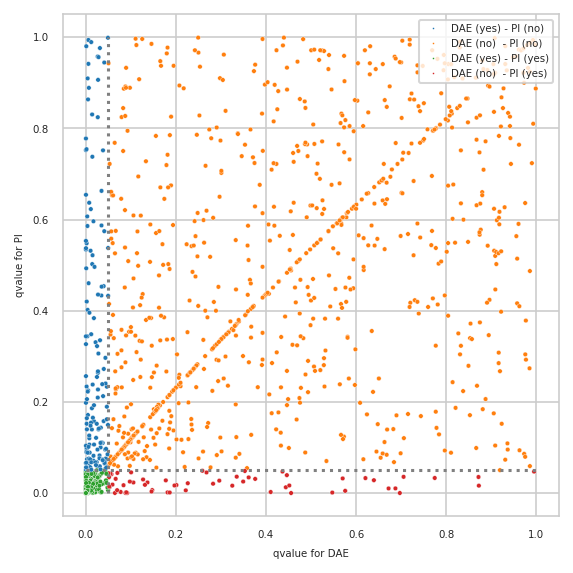

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_2_DAE


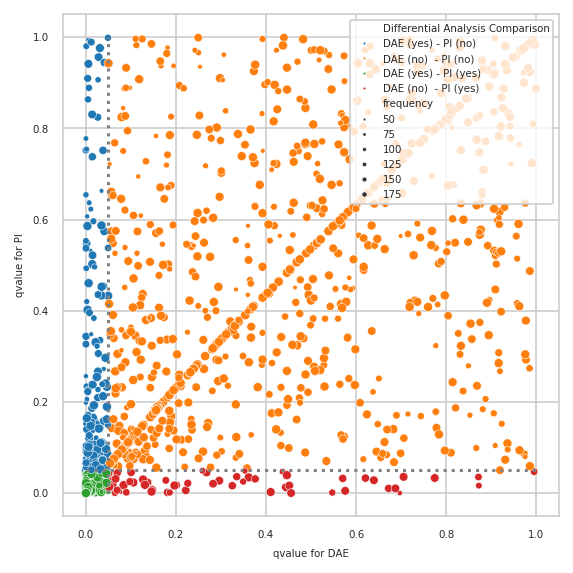

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


ENSP  score
None                            
APOE      ENSP00000252486  5.000
PSEN2     ENSP00000355747  5.000
PSEN1     ENSP00000326366  5.000
APP       ENSP00000284981  5.000
TREM2     ENSP00000362205  4.825
...                   ...    ...
ERP27     ENSP00000266397  0.681
ZNF585B   ENSP00000433773  0.681
KIR3DL2   ENSP00000325525  0.681
C12orf66  ENSP00000311486  0.681
ELP2      ENSP00000414851  0.681

[10000 rows x 2 columns]

## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/924ec7e362d761ecf0807b9074d79999_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out